# Assaginment 12 DeepLearning for MultiLayered Neural Network

Objective : Wokring with Keras and Experiment with Different Nueral Network Architectures.


Dataset : Mnist DataSet which is avialalbe in Keras Dataset by default.

Developer Details : PraveenAI

Source Details : Most of the code is extracted from https://keras.io/losses/ and Base Archictural Refference is from the code shared by Varma from Applied AI.



## Keras 

**datasets.mnist.load_data()** : 
> Can load the Mnist datsets which is available by default provided by  Keras.
  
**np_utils.to_categorical** :
> This will help to Converts a class vector (integers) to binary class matrix.(like one-hot coding)


**Sequential()**
> To start initializing the linear stack of layers.
> we can create a Sequential model by passing a list of layer instances to the constructor:


**add(Dense())**
> This means we are Adding a Layer to the Sequesnce. 

> input_dim = this is only for the first layer, so theat NN will understand the Input dimensions

> activation= We provide the Activation function inside the Neurons 

> input_shape =  No of nuerons inside is depends on the input parametres to the Dense  

> kernel_initializer = helps to Initialize the weights for each connection from one layer to another layer.

**Dropout**
> Fraction of the input units to drop


**BatchNormalization()**
> If we have to Many Layer, there might be change Vanishing Gradients Problem.

> To avoid to some extent, Batch Normalization will Normalize the activations of the previous layer at each batch.

> It will make the mean to 0 and Std Devaiotion to 1.

**compile()**
> This compiles the Sequence that we defined with accpeting some input params 

> optimizer = This helps in controling the Learning Rate of the Weights.

> loss= we have to input loss function based on the type of that problemset we are working on.

> metrics= we have to input the Perfomance metric that we are looking for 


In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
import seaborn as sns
from keras.initializers import RandomNormal
from warnings import catch_warnings

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


**Reshape the DataSet Dimensinality**

In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])



# after converting the input images from 3d to 2d vectors
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


**Data Normlization**

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

**Convert Labels to Categories for Softmax Activation(One-Hot coding)**

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Plot Train Los and Test Loss Vs Epochs**

In [0]:
%matplotlib inline
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
Total_SUMRY ={}

Below we are gonna Experiment with three Different Architecture on Mnist Dataset.

We are consdiering Accuracy as perfomance metric.



# Architecture 1 :  784-784-424-10 (2 Hidden Layer with 784,424 Relu)

>>**MLP + Relu activation + AdamOtpimizer **





In [0]:
#model parameters

batch_size = 128
nb_epoch = 20

input_dim = X_train.shape[1] #784
H_Layer_1 = 784
H_Layer_2 = 424
output_dim = 10

In [0]:
model_1 = Sequential()
model_1.add(Dense(input_dim ,activation='relu',input_shape=(input_dim,)))
model_1.add(Dropout(0.1))
model_1.add(Dense(H_Layer_1, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(BatchNormalization())
model_1.add(Dense(H_Layer_2, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(BatchNormalization())
model_1.add(Dense(output_dim, activation='softmax'))
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_28 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_29 (Dropout)         (None, 784)               0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 784)               3136      
_________________________________________________________________
dense_49 (Dense)             (None, 424)               332840    
_________________________________________________________________
dropout_30 (Dropout)         (None, 424)               0         
__________

We have initialized our model with  batch_size is 128 and 20  no of epoch 

1st Layer is with 784 Relu activation Function and the 2nd Layer with  424 


In [0]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 438us/step - loss: 0.2731 - acc: 0.9158 - val_loss: 0.1306 - val_acc: 0.9600
Epoch 2/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.1186 - acc: 0.9644 - val_loss: 0.0902 - val_acc: 0.9719
Epoch 3/20
60000/60000 [==============================] - 23s 389us/step - loss: 0.0856 - acc: 0.9735 - val_loss: 0.0855 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.0665 - acc: 0.9792 - val_loss: 0.0725 - val_acc: 0.9769
Epoch 5/20
60000/60000 [==============================] - 23s 390us/step - loss: 0.0552 - acc: 0.9824 - val_loss: 0.0635 - val_acc: 0.9799
Epoch 6/20
60000/60000 [==============================] - 24s 392us/step - loss: 0.0473 - acc: 0.9853 - val_loss: 0.0730 - val_acc: 0.9776
Epoch 7/20
60000/60000 [==============================] - 23s 388us/step - loss: 0.0422 - acc: 0.9864 - val_loss: 0.

Test score   : 0.06464198227513315
Test accuracy: 0.9836
Train accuracy: 0.9982666666666666


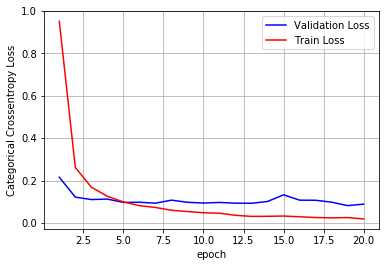

In [0]:
score1_tst = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score   :', score1_tst[0]) 
print('Test accuracy:', score1_tst[1])

score1_trn = model_1.evaluate(X_train, Y_train, verbose=0) 
print('Train accuracy:', score1_trn[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Total_SUMRY[1]=["Model1", "2", "784-424" ,"Relu","Adam","No","No-Initialization",score1_trn[1],score1_tst[1]]


As we notice, Loos is so high for Train Data at intial Epochs.

Test Loss for lesser than the Validation lost till the first five epochs.

For every Gradient the loss is converging, but form 15th epoch it is stable for both Test  and Validation.

At the 4th epoc bot values are same, 0.18.

**Model Performance**

Test accuracy: 0.9836 and Train accuracy: 0.999

Seems it is Overfitting, since both accuracies are converging,  we can not say it.

it is Overfitting, if the Test accuracy is very low than Train accuracy is so high.

Hence, the Above Architecture is Performing very Well.



# Architecture 2: 
## **784-524-462-128-10 (3 Hidden Layer with 524,462,128 Relu)**

>>**MLP + Relu Activation + adam  Optimizer + RandomNormal Initialization**

In [0]:
#model parameters

batch_size = 200
nb_epoch = 20

input_dim = X_train.shape[1] #784
H_Layer_1 = 524
H_Layer_2 = 462
H_Layer_3 = 128
output_dim = 10

In [0]:
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# hi =>  σ=√(2/(fan_in) 
# out =>  σ=√(2/(fan_in+1)
model_2 = Sequential()
model_2.add(Dense(input_dim ,activation='relu',input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.0618, seed=None)))
model_2.add(Dropout(0.1))
model_2.add(Dense(H_Layer_1, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0633, seed=None)))
model_2.add(Dropout(0.2))
model_2.add(BatchNormalization())
model_2.add(Dense(H_Layer_2, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.0658, seed=None)))
model_2.add(Dropout(0.45))
model_2.add(BatchNormalization())
model_2.add(Dense(H_Layer_2, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)))
model_2.add(Dropout(0.5))
model_2.add(BatchNormalization())
model_2.add(Dense(output_dim, activation='softmax'))
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_31 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 524)               411340    
_________________________________________________________________
dropout_32 (Dropout)         (None, 524)               0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 524)               2096      
_________________________________________________________________
dense_53 (Dense)             (None, 462)               242550    
_________________________________________________________________
dropout_33 (Dropout)         (None, 462)               0         
__________

In [0]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 385us/step - loss: 0.4241 - acc: 0.8682 - val_loss: 0.1256 - val_acc: 0.9605
Epoch 2/20
60000/60000 [==============================] - 20s 336us/step - loss: 0.1519 - acc: 0.9547 - val_loss: 0.1005 - val_acc: 0.9679
Epoch 3/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.1045 - acc: 0.9681 - val_loss: 0.0835 - val_acc: 0.9744
Epoch 4/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.0785 - acc: 0.9768 - val_loss: 0.0724 - val_acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.0612 - acc: 0.9811 - val_loss: 0.0766 - val_acc: 0.9786
Epoch 6/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.0504 - acc: 0.9845 - val_loss: 0.0740 - val_acc: 0.9792
Epoch 7/20
60000/60000 [==============================] - 20s 338us/step - loss: 0.0448 - acc: 0.9859 - val_loss: 0.

Test score   : 0.07809708171830716
Test accuracy: 0.9834
Train score   : 0.005488861975786434
Train accuracy: 0.9982


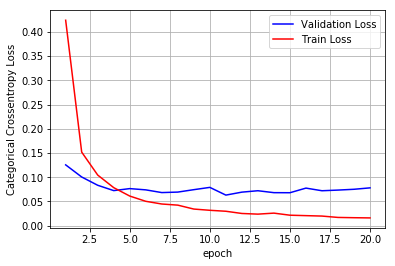

In [0]:
score2_tst = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score   :', score2_tst[0]) 
print('Test accuracy:', score2_tst[1])

score2_trn = model_2.evaluate(X_train, Y_train, verbose=0) 
print('Train score   :', score2_trn[0]) 
print('Train accuracy:', score2_trn[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


Total_SUMRY[2]=["Model2", "3", "524-462-128" ,"Relu","Adam","Yes","Random Normal",score2_trn[1],score2_tst[1]]


As we notice, Los is so high for Train Data at intial Epochs.

Test Loss for lesser and constan for most of the epoch with very litile changes.

For every Gradient the validation loss is converging.
Even form 15th epoch also, it is stable for both Test  and Validation.

At the 4th epoc bot values are same, 0.08.

**Model Performance**

Test accuracy: 0.9834 and Train accuracy: 0.992

Seems it is Overfitting, since both accuracies are with small difference.,  we can not say it.

It is Overfitting, if the Test accuracy is very low and the Train accuracy is so high.

Hence, the Above Architecture is Performing very Well.


# Architecture 3 :  784-500-425-350-124-64-10

>>**MLP + Relu Activation + Adam Optimizer + BatchNormalization + DropOut **


In [0]:
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

In [0]:
#model parameters

batch_size = 200
nb_epoch = 20

input_dim  = X_train.shape[1] #784
H_Layer_1  = 500
H_Layer_2  = 425
H_Layer_3  = 350
H_Layer_4  = 124
H_Layer_5  = 64
output_dim = 10 

In [0]:
# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# hi =>  σ=√(2/(fan_in) 
# out =>  σ=√(2/(fan_in+1)

model_3 = Sequential()
model_3.add(Dense(input_dim ,activation='relu',input_shape=(input_dim,),kernel_initializer=RandomNormal(mean=0.0, stddev=0.0633, seed=None)))
model_3.add(Dense(H_Layer_1 ,activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.0632, seed=None)))
model_3.add(Dropout(0.2))
model_3.add(Dense(H_Layer_2, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.0685, seed=None)))
model_3.add(Dropout(0.3))
model_3.add(BatchNormalization())
model_3.add(Dense(H_Layer_3, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.0756, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))
model_3.add(BatchNormalization())
model_3.add(Dense(H_Layer_4, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.127, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.45))
model_3.add(Dense(H_Layer_5, activation='relu',kernel_initializer=RandomNormal(mean=0.0, stddev=0.1768, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))
model_3.add(Dense(output_dim, activation='softmax'))
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_57 (Dense)             (None, 500)               392500    
_________________________________________________________________
dropout_35 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 425)               212925    
_________________________________________________________________
dropout_36 (Dropout)         (None, 425)               0         
_________________________________________________________________
batch_normalization_29 (Batc (None, 425)               1700      
_________________________________________________________________
dense_59 (Dense)             (None, 350)               149100    
__________

In [0]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 396us/step - loss: 0.9511 - acc: 0.7104 - val_loss: 0.2158 - val_acc: 0.9377
Epoch 2/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.2619 - acc: 0.9315 - val_loss: 0.1222 - val_acc: 0.9639
Epoch 3/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.1688 - acc: 0.9578 - val_loss: 0.1105 - val_acc: 0.9697
Epoch 4/20
60000/60000 [==============================] - 19s 322us/step - loss: 0.1261 - acc: 0.9682 - val_loss: 0.1128 - val_acc: 0.9696
Epoch 5/20
60000/60000 [==============================] - 20s 326us/step - loss: 0.0996 - acc: 0.9748 - val_loss: 0.0972 - val_acc: 0.9773
Epoch 6/20
60000/60000 [==============================] - 19s 324us/step - loss: 0.0818 - acc: 0.9797 - val_loss: 0.0980 - val_acc: 0.9766
Epoch 7/20
60000/60000 [==============================] - 19s 320us/step - loss: 0.0735 - acc: 0.9816 - val_loss: 0.

Test score   : 0.08903393339179748
Test accuracy: 0.9836
Train score   : 0.010572065364455194
Train accuracy: 0.9974


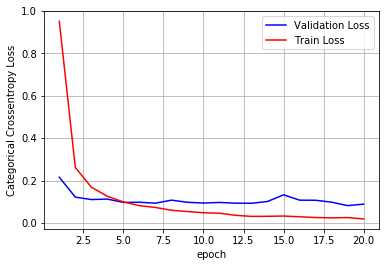

In [0]:
score3_tst = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score   :', score3_tst[0]) 
print('Test accuracy:', score3_tst[1])

score3_trn = model_3.evaluate(X_train, Y_train, verbose=0) 
print('Train score   :', score3_trn[0]) 
print('Train accuracy:', score3_trn[1])


fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)
Total_SUMRY[3]=["Model3", "5", "500-425-350-124-64" ,"Relu","Adam","Yes","Random Normal",score3_trn[1],score3_tst[1]]


This is almost similar to the first Architecture

At the 4th epoc bot values are same, 0.17.

As we notice, Los is so high for Train Data at intial Epochs.

Test Loss for lesser and constan for most of the epoch with very litile changes.

At the 4th epoc bot values are same, 0.17.

**Model Performance**

Test accuracy: 0.9836 and Train accuracy: 0.9974

Seems it is Overfitting, since both accuracies are with small difference.,  we can not say it.

It is Overfitting, if the Test accuracy is very low and the Train accuracy is so high.

Hence, the Above Architecture is Performing very Well.


In [0]:
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "No of Layers", "No of Nuerons","Activation","Optimizer","Dropout","Initialization","Test ACC","Train ACC"]
for i,j in enumerate(Total_SUMRY):
  x.add_row([Total_SUMRY[j][0],Total_SUMRY[j][1],Total_SUMRY[j][2],Total_SUMRY[j][3],Total_SUMRY[j][4],Total_SUMRY[j][5],Total_SUMRY[j][6],Total_SUMRY[j][7],Total_SUMRY[j][8]])
  #print(Total_SUMRY[j][0]," = ",Total_SUMRY[j][1]," = ",Total_SUMRY[j][2]," = ",Total_SUMRY[j][3]," = ",Total_SUMRY[j][4]," = ",Total_SUMRY[j][5]," = ",Total_SUMRY[j][6]," = ",Total_SUMRY[j][7])    
print(x)


+--------+--------------+--------------------+------------+-----------+---------+-------------------+--------------------+-----------+
| Model  | No of Layers |   No of Nuerons    | Activation | Optimizer | Dropout |   Initialization  |      Test ACC      | Train ACC |
+--------+--------------+--------------------+------------+-----------+---------+-------------------+--------------------+-----------+
| Model1 |      2       |      784-424       |    Relu    |    Adam   |    No   | No-Initialization | 0.9982666666666666 |   0.9836  |
| Model2 |      3       |    524-462-128     |    Relu    |    Adam   |   Yes   |   Random Normal   |       0.9982       |   0.9834  |
| Model3 |      5       | 500-425-350-124-64 |    Relu    |    Adam   |   Yes   |   Random Normal   |       0.9974       |   0.9836  |
+--------+--------------+--------------------+------------+-----------+---------+-------------------+--------------------+-----------+


# Conclusion

We are getting almost all nearest accuracy values.But still out of three Model1 is performing litle bit higher.
